In [1]:
import folium

In [2]:
latitude, longitude = (40.809978, -73.96096)

In [3]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=17,#시작 화면 확대 범위
               width=750, #너비
               height=500)#높이

In [4]:
popup_tag = """
<div.style='width:100ppx'>
 <a href = "https://www.bing.com/search?q=columnbia+business+school&qs=n&form=QBRE&sp=-1&ghc=1&lq=0&pq=columnbia+business+school&sc=9-25&sk=&cvid=FABC9436CB7E4C859D557FE04032AF1E&ghsh=0&ghacc=0&ghpl=">
  Columnbia Business School
 <a/>
</div>
""" 

In [5]:
folium.Marker(location=(latitude, longitude),
              popup="<div.style='width:100ppx'>Columbia Business School</div>",
              tooltip="Columbia Business School"
              ).add_to(m)
m

In [6]:
import requests
import json

In [7]:
url ="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
response = requests.get(url)
data_json = response.json()

In [8]:
country_name = [feature['properties']['name']for feature in data_json['features']]

In [9]:
import pandas as pd

In [10]:
import seaborn as sns

In [11]:
import numpy as np

In [15]:
survey_raw_df = pd.read_csv("datas/survey_results_public.csv", index_col="ResponseId")

In [16]:
country = survey_raw_df.Country.copy() 

In [ ]:
survey_raw_df .Country.unique()

In [ ]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country': country_counts.index,
                                  'Cont': country_counts.values})
country_counts_df

In [20]:
country_counts_df.at[12, 'Country']

'Russian Federation'

In [ ]:
country.replace(rename_data)

In [ ]:
country_name

In [22]:
rename_data = {
    'Republic of Korea': 'South Korea',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
}

In [23]:
country_counts_df.replace(rename_data, inplace=True)

In [ ]:
sorted(country_counts_df.Country.values)

In [25]:
country_counts_df.loc[country_counts_df.Country==rename_data.values()]

,Country,Cont


In [26]:
country_counts_df.at[12, 'Country'] = 'Russia'

In [27]:
m = folium.Map(location=[30, 0], zoom_start=2)

In [28]:
m

In [29]:
country_counts_df.columns

Index(['Country', 'Cont'], dtype='object')

In [30]:
url

'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [33]:
country_counts_df

,Country,Cont
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [34]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=url,
    data=country_counts_df,
    columns=["Country", "Cont"],
    key_on="feature.properties.name",
    threshold_scale=[1, 30, 100, 300, 1000, 3000, 10000, 14000],
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

In [36]:
m.save("Country.html")

In [40]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)

folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

In [41]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)

folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

In [8]:
from wordcloud import WordCloud

In [9]:
import pandas as pd

In [3]:
%pwd

'C:\\python'

In [10]:
survey_raw_df = pd.read_csv("datas/survey_results_public.csv", index_col="ResponseId")

In [16]:
dev_type = survey_raw_df.DevType.copy()

In [17]:
dev_type.dropna(inplace=True)

In [18]:
dev_type = dev_type.str.replace(";", " ").str.replace(","," ")

In [19]:
dev_type

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [21]:
words = ''.join(dev_type)

In [ ]:
words

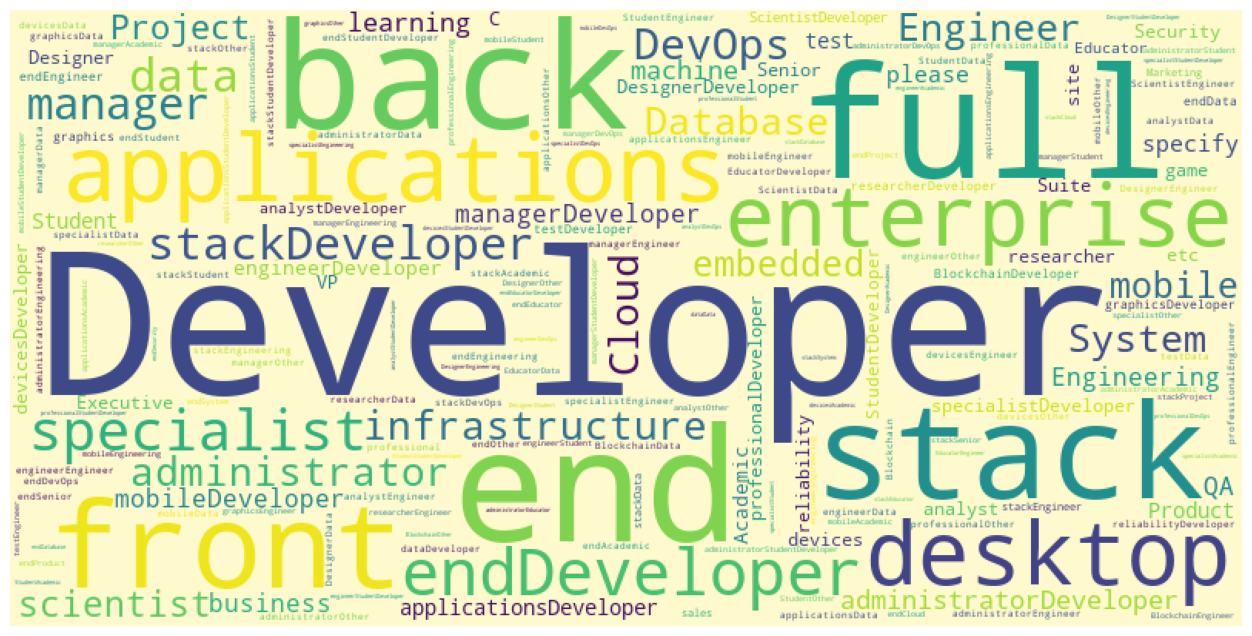

In [27]:
import matplotlib.pyplot as plt

wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400,
               background_color="lemonchiffon").generate(words)

plt.figure(figsize=(16, 8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc)
plt.show()

In [29]:
wc.to_file("datas/DevType.png")